In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation
import pickle
import numpy as np
import networkx as nx
import seaborn as sns
from IPython.display import HTML

from saved files get:
- time series data
- environment
- final driver models

In [134]:
PATH = "parameter_averaging_results/4x4_grid_braess/dqn_25_exploration_random_iot_False_N100_dex-one-way_E200_I6400_FLNone"

# with open(f"{PATH}/data", "rb") as file:
#     data = pickle.load(file)
# with open(f"{PATH}/drivers_pretrained", "rb") as file:
#     drivers = pickle.load(file)
with open(f"{PATH}/trips_1", "rb") as file:
    trips = pickle.load(file)
with open(f"{PATH}/trajectory_1", "rb") as file:
    trajectory = pickle.load(file)

## data

In [23]:
travel_time = [np.abs(data[t]["average_trip_time"]) for t in data.keys()]

Text(0.5, 0, 'timestep')

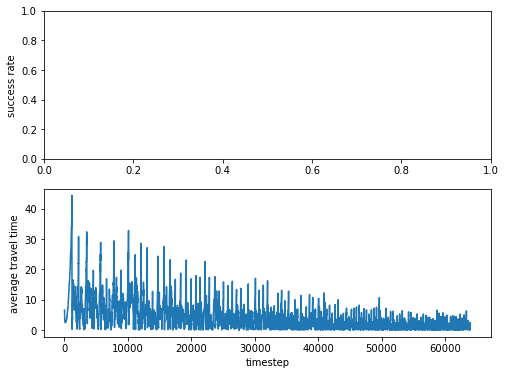

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
# ax[0].plot(success, color="red")
ax[0].set_ylabel("success rate")
ax[1].plot(travel_time)
ax[1].set_ylabel("average travel time")
ax[1].set_xlabel("timestep")
# plt.savefig("preliminary_results.png")

In [13]:
import torch

In [16]:
N_STATES = 16
SIZE = 4
N_ACTIONS = 4
N_AGENTS = 100

In [17]:
transitions = [data[t]["transitions"] for t in data.keys()]

In [22]:
transitions[0][0]

(2,
 {'state': tensor([[1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.2500, 0.2500, 0.2500, 0.2500]]),
  'action': tensor([0]),
  'next_state': tensor([0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.2500, 0.2500, 0.2500, 0.2500]),
  'reward': tensor([-1.1500])})

In [23]:
state = transitions[0][0][1]["state"]

In [29]:
state = state.squeeze(0)

In [44]:
state_x, state_y = state[0:4], state[4:8]

In [37]:
x,y

(tensor([1., 0., 0., 0.]), tensor([1., 0., 0., 0.]))

In [46]:
amax_x, amax_y = state_x.argmax(0), state_y.argmax(0)

In [47]:
x, y = int(amax_x), int(amax_y)

In [18]:
state_action_visits = {
    n: np.zeros((SIZE, SIZE, N_ACTIONS)) for n in range(N_AGENTS)
}

In [20]:
one_hot_enc = {(l, r): np.concatenate(
            [np.array([0 if i != l else 1 for i in range(SIZE)]),
             np.array([0 if i != r else 1 for i in range(SIZE)])]) for
            (l, r) in G.nodes()}

In [21]:
inv_map = {v: k for k, v in one_hot_enc.items()}

TypeError: unhashable type: 'numpy.ndarray'

In [60]:
def count_state_action_visits(transitions):       
    for steps in transitions:
        for tup in steps:
            n, transition = tup

            state = transition["state"]
            state = state.squeeze(0)
            state_x, state_y = state[0:4], state[4:8]
            amax_x, amax_y = state_x.argmax(0), state_y.argmax(0)
            x, y = int(amax_x), int(amax_y)

            action = transition["action"]
            action = action.squeeze(0)
            amax_action = action.argmax(0)
            a = int(amax_action)

            state_action_visits[n][x, y, a] += 1
    return state_action_visits

In [53]:
from scipy.stats import entropy

In [ ]:
def calculate_driver_entropy(state_action_visits):
    H = {}

    for agent, visits in state_action_visits.items():
        total_actions = visits.sum()
        flat_visits = (visits/total_actions).flatten()
        h = entropy(flat_visits)
        H[agent] = h
    return H

In [52]:
state_action_visits

{0: array([[[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [2., 0., 0., 0.],
         [1., 0., 0., 0.]]]),
 1: array([[[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [2., 0., 0., 0.],
         [1., 0., 0., 0.]]]),
 2: array([[[1., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 

In [58]:
H = {}

for agent, visits in state_action_visits.items():
    total_actions = visits.sum()
    flat_visits = (visits/total_actions).flatten()
    h = entropy(flat_visits)
    H[agent] = h

### trajectory

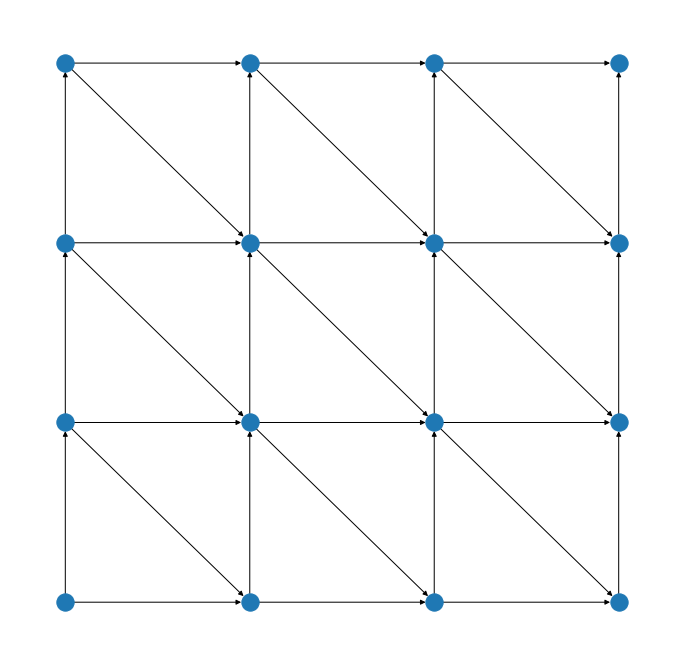

In [135]:
size = 4
G = nx.grid_graph(dim=(size, size))
# for e in G.edges():
#     G.edges[e]["cost"] = lambda x: 10 + x

edge_list = [edge for edge in G.edges]

dG = nx.DiGraph(incoming_graph_data=edge_list)

dG.add_edge((0, 1), (1, 0), cost=lambda x: 0)
dG.add_edge((0, 2), (1, 1), cost=lambda x: 0)
dG.add_edge((0, 3), (1, 2), cost=lambda x: 0)
dG.add_edge((1, 1), (2, 0), cost=lambda x: 0)
dG.add_edge((1, 2), (2, 1), cost=lambda x: 0)
dG.add_edge((1, 3), (2, 2), cost=lambda x: 0)
dG.add_edge((2, 1), (3, 0), cost=lambda x: 0)
dG.add_edge((2, 2), (3, 1), cost=lambda x: 0)
dG.add_edge((2, 3), (3, 2), cost=lambda x: 0)

for node in dG.nodes():
    edges = dG.edges(node)
    for edge in edges:
        if edge[1][0] == edge[0][0] + 1:
            # set cost to variable
            dG.edges[edge]["cost"] = lambda x: x / 100
        elif edge[1][1] == edge[0][1] + 1:
            # set cost to fixed
            dG.edges[edge]["cost"] = lambda x: 1

positions = {node: node for node in G.nodes()}

G = dG

fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(G, pos=positions, ax=ax)
# plt.savefig("empty_grid.png")
plt.show()

In [136]:
states_counts = []
edges_actions = []
destinations_counts = []
n_agents = 100

for experience in trajectory:
    states_counts.append(experience[1])
    edges_actions.append(experience[2])
    destinations_counts.append(experience[-1])

In [137]:
def update(num):
    num = len(states_counts)-1000+num

    ax.clear()
    occupied_states = states_counts[num].keys()
    occupied_states_counts = states_counts[num].values()
    destinations = destinations_counts[num]
    
    nodes = set(G.nodes())
    occ_s = set([tuple(s) for s in occupied_states])
    destination_alphas = [counts/n_agents for counts in destinations.values()]
    destinations = set([tuple(s) for s in destinations.keys()])
    
    
    node_labels = states_counts[num]
    edgelist = edges_actions[num].keys()
    edge_labels = edges_actions[num]
    
    # Background nodes
    nx.draw_networkx_edges(G, pos=positions, ax=ax, edge_color="gray")
    null_nodes = nx.draw_networkx_nodes(G, pos=positions, nodelist=nodes - occ_s, 
                                        node_color="white", ax=ax)
    null_nodes.set_edgecolor("black")
    destination_nodes = nx.draw_networkx_nodes(G, pos=positions, nodelist=destinations, 
                                               node_color="green", alpha=destination_alphas, ax=ax)
    destination_nodes.set_edgecolor("green")
    
    # Query nodes
    query_nodes = nx.draw_networkx_nodes(
        G, 
        pos=positions, 
        nodelist=occ_s,
        node_size=1500,
        node_color=[node_labels[node] for node in occ_s],
        cmap="inferno_r",
        vmin=0,
        vmax=100,
        ax=ax)
    query_nodes.set_edgecolor("white")
    nx.draw_networkx_labels(G, pos=positions, labels=node_labels, font_size = 15, font_color="black", ax=ax)
    
    # Traversed edges
    nx.draw_networkx_edges(G, 
                           pos=positions, 
                           edgelist=edgelist,
                           ax=ax)
    nx.draw_networkx_edge_labels(G, 
                           pos=positions, 
                           edge_labels=edge_labels,
                           ax=ax)

    ax.set_xticks([])
    ax.set_yticks([])

In [138]:
ani = matplotlib.animation.FuncAnimation(fig, update, frames=100, interval=50, repeat=True)
HTML(ani.to_jshtml())

In [365]:
ani.save('test.mp4')

## trips

In [65]:
n_agents = 100

In [66]:
trips.keys()

dict_keys([12, 92, 38, 29, 11, 39, 19, 16, 76, 87, 60, 95, 70, 96, 98, 75, 22, 33, 3, 62, 42, 25, 66, 30, 97, 17, 83, 32, 28, 55, 2, 18, 80, 50, 20, 78, 36, 9, 7, 54, 90, 68, 85, 86, 52, 21, 4, 79, 56, 73, 26, 82, 63, 99, 59, 37, 88, 84, 5, 24, 72, 58, 0, 67, 71, 69, 31, 77, 65, 51, 1, 14, 48, 81, 13, 49, 57, 46, 45, 74, 61, 6, 27, 93, 44, 34, 89, 15, 10, 94, 91, 64, 41, 40, 23, 8, 43, 47, 53, 35])

In [67]:
timeseries = np.zeros((n_agents, len(trips[0])))

In [68]:
for k,v in trips.items():
#     for j, i in enumerate(np.array([ele[1] for ele in v])):
#         timeseries[k, j] = i
    timeseries[k] = np.array([ele[1] for ele in v])

In [69]:
PATH

'parameter_averaging_results/4x4_grid_random/dqn_25_exploration_random_iot_False_N100_dex-work-commute_E200_I6400_FLagents_at_base_node'

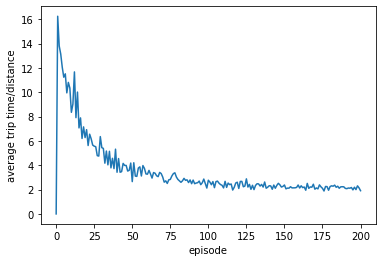

In [70]:
plt.plot(timeseries.mean(axis=0))
plt.ylabel("average trip time/distance")
plt.xlabel("episode")
plt.savefig(f"{PATH}/system_performance_timeseries.png")

In [5]:
travel_times = {}
travel_steps = {}
max_step = 0
for agent, trip in trips.items():
    trip_time = np.array([metrics[1] for metrics in trip]).flatten()  #extract the travel time
    trip_step = np.array([metrics[0] for metrics in trip]).flatten().astype(int)  #extract the steps
    trip_freeflow_length = np.abs(np.diff(np.array([metrics[2] for metrics in trip[1:]]), axis=0).sum(axis=1).sum(axis=1))
    trip_freeflow_length = np.concatenate([np.array([6]), trip_freeflow_length])  # add first freeflow length
    normalization = np.where(trip_freeflow_length==0, 2, trip_freeflow_length)
    max_step = max(max_step, trip_time[-1])
    travel_times[agent] = np.diff(trip_time)/normalization
    travel_steps[agent] = trip_time[1:]

AxisError: axis 1 is out of bounds for array of dimension 1

In [93]:
Y.shape

(100, 123)

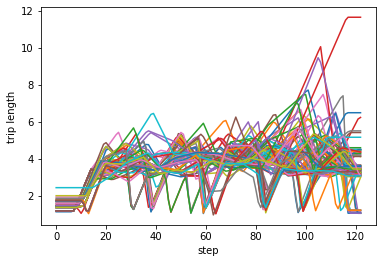

In [89]:
x = np.arange(0, int(max_step))
Y = np.zeros((n_agents, int(max_step)))
for agent, times in travel_times.items():
    y = np.interp(x, travel_steps[agent], times)
    Y[agent, :] = y
    plt.plot(x, y)
    
plt.ylabel("trip length")
plt.xlabel("step")
plt.savefig(f"{PATH}/trip_lengths_timeseries.png")

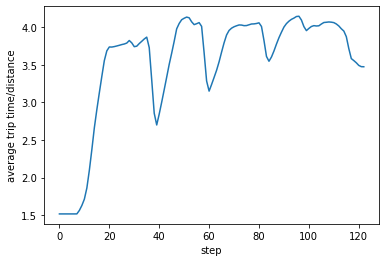

In [90]:
plt.plot(Y.mean(axis=0))
plt.ylabel("average trip time/distance")
plt.xlabel("step")
plt.savefig(f"{PATH}/system_performance_timeseries.png")

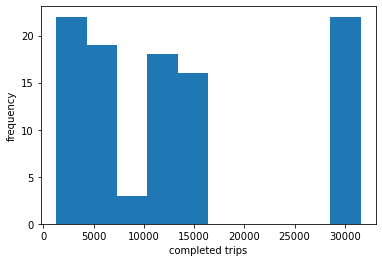

In [27]:
plt.hist([len(steps) for steps in travel_times.values()])
plt.ylabel("frequency")
plt.xlabel("completed trips")
plt.savefig(f"{PATH}/completed_trips_histogram.png")

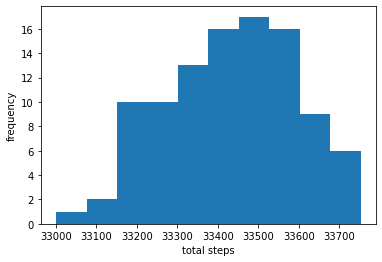

In [28]:
plt.hist([steps[-1] for steps in travel_steps.values()])
plt.ylabel("frequency")
plt.xlabel("total steps")
plt.savefig(f"{PATH}/trip_length_histogram.png")

### Visits Heatmaps

In [5]:
## plot heatmap of state visits for initial and final agents
early_episode = data[10]["trajectory"]
late_episode = data[999]["trajectory"]

early_visits = np.zeros((4, 4))
for experience in early_episode:
    for k, v in experience[1].items():
        early_visits[k[0], k[1]] += v

late_visits = np.zeros((4, 4))
for experience in late_episode:
    for k, v in experience[1].items():
        late_visits[k[0], k[1]] += v

        
fig, ax = plt.subplots(ncols=2, figsize=(12, 12))
ax[0].imshow(early_visits, origin="lower")
ax[1].imshow(late_visits, origin="lower")

ax[0].set_yticks([])
ax[1].set_yticks([])

ax[0].set_xticks([])
ax[1].set_xticks([])

ax[0].set_title("early training step")
ax[1].set_title("last training step")

plt.tight_layout()
plt.savefig("visits_heatmap")

KeyError: 'trajectory'

## Visualize Driver Q-Values

In [ ]:
import torch

In [ ]:
drivers[0].policy_net(torch.tensor([0,0,0,1,0,0,0,1,0.5], dtype=torch.float32))

In [ ]:
one_hot_enc = {(l, r): np.concatenate([
    np.array([0 if i != l else 1 for i in range(size)]), 
    np.array([0 if i != r else 1 for i in range(size)])
]) for(l, r) in G.nodes()}

In [ ]:
avg_values = np.zeros((size, size, 1))
var_values = np.zeros((size, size, 1))

In [ ]:
for i in range(size):
    for j in range(size):
        values = torch.zeros((100, 4))
        for n, driver in drivers.items():
            values[n] = driver.policy_net(torch.tensor(
                one_hot_enc[i, j], dtype=torch.float32))
        avg_values[i, j] = values.numpy(force=True).mean()
        var_values[i, j] = values.numpy(force=True).var(axis=0).mean()

In [ ]:
plt.imshow(avg_values, origin="lower")
plt.colorbar()

In [ ]:
plt.imshow(var_values, origin="lower")
plt.colorbar()

In [ ]:
edge_action_values = dict()
for node in G.nodes():
    values = torch.zeros((100, 4))
    for n, driver in drivers.items():
        values[n] = driver.policy_net(torch.tensor(
            one_hot_enc[node], dtype=torch.float32))
    values = values.numpy(force=True)
    for action, edge in enumerate(G.edges(node)):
        edge_action_values[edge] = values[:,action]

In [ ]:
edge_labels = {}
for edge, action_values in list(edge_action_values.items()):
    x0, x1 = edge
    if sum(x0) > sum(x1):
        x0_x1_values = action_values.mean()
        x1_x0_values = edge_action_values[(x1, x0)].mean()
        edge_labels[(x1, x0)] = f"{-1*x0_x1_values:.2f} ---- {-1*x1_x0_values:.2f}"

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(G, pos=positions, ax=ax)
nx.draw_networkx_edge_labels(G, 
                           pos=positions, 
                           edge_labels=edge_labels,
                           ax=ax,
                            font_size=15)
plt.show()

In [ ]:
from collections import defaultdict

In [ ]:
a = {0: 0}
defaultdict(lambda: 0, a)

In [ ]:
list(G.edges((0,0))) + list(G.edges((0,1)))

## Sandbox

In [114]:
path1 = "parameter_averaging_results/4x4_grid_initial/dqn_25_exploration_random_iot_False_N100_dex-one-way_E200_I6400_FLNone"

with open(f"{path1}/trips", "rb") as file:
    trips1 = pickle.load(file)

path2 = "parameter_averaging_results/4x4_grid_initial/dqn_25_exploration_random_iot_False_N100_dex-one-way_E200_I6400_FLagents_at_base_node"

with open(f"{path2}/trips", "rb") as file:
    trips2 = pickle.load(file)

# path3 = "parameter_averaging_results/4x4_grid_random/dqn_25_exploration_random_iot_False_N100_dex-work-commute_E200_I6400_FLagents_at_base_node"

# with open(f"{path3}/trips", "rb") as file:
#     trips3 = pickle.load(file)

In [115]:
timeseries1 = np.zeros((n_agents, len(trips[0])))
timeseries2 = np.zeros((n_agents, len(trips[0])))
timeseries3 = np.zeros((n_agents, len(trips[0])))

for k,v in trips1.items():
    timeseries1[k] = np.array([ele[1] for ele in v])
    
for k,v in trips2.items():
    timeseries2[k] = np.array([ele[1] for ele in v])
    
# for k,v in trips3.items():
#     timeseries3[k] = np.array([ele[1] for ele in v])

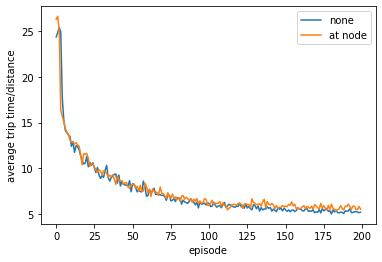

In [116]:
plt.plot(timeseries1.mean(axis=0)[1:], label="none")
plt.plot(timeseries2.mean(axis=0)[1:], label="at node")
plt.ylabel("average trip time/distance")
plt.xlabel("episode")
plt.legend()
# plt.savefig(f"combined_system_performance_timeseries.png")

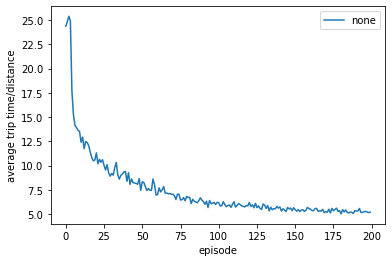

In [89]:
with open("parameter_averaging_results/4x4_grid_initial/dqn_25_exploration_random_iot_False_N100_dex-one-way_E200_I6400_FLNone/trips", "rb") as file:
    trips = pickle.load(file)

timeseries = np.zeros((n_agents, len(trips[0])))

for k,v in trips.items():
    timeseries[k] = np.array([ele[1] for ele in v])

plt.plot(timeseries.mean(axis=0)[1:], label="none")
plt.ylabel("average trip time/distance")
plt.xlabel("episode")
plt.legend()